# Seattle Car Accident Severity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Data-Collisions.csv")
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
severitycode,2,1,1,1,2
x,-122.323,-122.347,-122.335,-122.335,-122.306
y,47.7031,47.6472,47.6079,47.6048,47.5457
objectid,1,2,3,4,5
inckey,1307,52200,26700,1144,17700
coldetkey,1307,52200,26700,1144,17700
reportno,3502005,2607959,1482393,3503937,1807429
status,Matched,Matched,Matched,Matched,Matched
addrtype,Intersection,Block,Block,Block,Intersection
intkey,37475,NaN,NaN,NaN,34387


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   severitycode    194673 non-null  int64  
 1   x               189339 non-null  float64
 2   y               189339 non-null  float64
 3   objectid        194673 non-null  int64  
 4   inckey          194673 non-null  int64  
 5   coldetkey       194673 non-null  int64  
 6   reportno        194673 non-null  object 
 7   status          194673 non-null  object 
 8   addrtype        192747 non-null  object 
 9   intkey          65070 non-null   float64
 10  location        191996 non-null  object 
 11  exceptrsncode   84811 non-null   object 
 12  exceptrsndesc   5638 non-null    object 
 13  severitycode.1  194673 non-null  int64  
 14  severitydesc    194673 non-null  object 
 15  collisiontype   189769 non-null  object 
 16  personcount     194673 non-null  int64  
 17  pedcount  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
severitycode,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
x,189339.0,-1.223305e+02,2.997605e-02,-1.224191e+02,-1.223487e+02,-1.223302e+02,-1.223119e+02,-1.222389e+02
y,189339.0,4.761954e+01,5.615664e-02,4.749557e+01,4.757596e+01,4.761537e+01,4.766366e+01,4.773414e+01
objectid,194673.0,1.084794e+05,6.264972e+04,1.000000e+00,5.426700e+04,1.069120e+05,1.622720e+05,2.195470e+05
inckey,194673.0,1.410915e+05,8.663440e+04,1.001000e+03,7.038300e+04,1.233630e+05,2.033190e+05,3.314540e+05
coldetkey,194673.0,1.412988e+05,8.698654e+04,1.001000e+03,7.038300e+04,1.233630e+05,2.034590e+05,3.329540e+05
intkey,65070.0,3.755845e+04,5.174599e+04,2.380700e+04,2.866700e+04,2.997300e+04,3.397300e+04,7.575800e+05
severitycode.1,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
personcount,194673.0,2.444427e+00,1.345929e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.100000e+01
pedcount,194673.0,3.713920e-02,1.981499e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [6]:
df.severitycode.value_counts().to_frame("count")

,count
1,136485
2,58188


In [7]:
df.status.value_counts().to_frame("count")

,count
Matched,189786
Unmatched,4887


In [8]:
df.addrtype.value_counts().to_frame("count")

,count
Block,126926
Intersection,65070
Alley,751


In [9]:
df.severitydesc.value_counts().to_frame("count")

,count
Property Damage Only Collision,136485
Injury Collision,58188


In [10]:
df.collisiontype.value_counts().to_frame("count")

,count
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [11]:
df.junctiontype.value_counts().to_frame("count")

,count
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [12]:
df.inattentionind = df.inattentionind.fillna("N")
df.inattentionind.value_counts().to_frame("count")

,count
N,164868
Y,29805


In [13]:
df.underinfl.value_counts().to_frame("count")

,count
N,100274
0,80394
Y,5126
1,3995


In [14]:
df.weather.value_counts().to_frame("count")

,count
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [15]:
df.roadcond.value_counts().to_frame("count")

,count
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [16]:
df.lightcond.value_counts().to_frame("count")

,count
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [17]:
df.speeding = df.speeding.fillna("N")
df.speeding.value_counts().to_frame("count")

,count
N,185340
Y,9333


In [18]:
df.hitparkedcar.value_counts().to_frame("count")

,count
N,187457
Y,7216


In [19]:
df.isna().sum()

severitycode           0
x                   5334
y                   5334
objectid               0
inckey                 0
coldetkey              0
reportno               0
status                 0
addrtype            1926
intkey            129603
location            2677
exceptrsncode     109862
exceptrsndesc     189035
severitycode.1         0
severitydesc           0
collisiontype       4904
personcount            0
pedcount               0
pedcylcount            0
vehcount               0
incdate                0
incdttm                0
junctiontype        6329
sdot_colcode           0
sdot_coldesc           0
inattentionind         0
underinfl           4884
weather             5081
roadcond            5012
lightcond           5170
pedrownotgrnt     190006
sdotcolnum         79737
speeding               0
st_colcode            18
st_coldesc          4904
seglanekey             0
crosswalkkey           0
hitparkedcar           0
dtype: int64

# Data Pre-processing

In [20]:
df.duplicated().sum()

0

In [21]:
df_clean = df[["severitycode","weather","lightcond","roadcond","speeding",
                 "underinfl","personcount","pedcylcount","pedcount","vehcount",
                "junctiontype","crosswalkkey"]]

In [22]:
df_clean.head()

,severitycode,weather,lightcond,roadcond,speeding,underinfl,personcount,pedcylcount,pedcount,vehcount,junctiontype,crosswalkkey
0,2,Overcast,Daylight,Wet,N,N,2,0,0,2,At Intersection (intersection related),0
1,1,Raining,Dark - Street Lights On,Wet,N,0,2,0,0,2,Mid-Block (not related to intersection),0
2,1,Overcast,Daylight,Dry,N,0,4,0,0,3,Mid-Block (not related to intersection),0
3,1,Clear,Daylight,Dry,N,N,3,0,0,3,Mid-Block (not related to intersection),0
4,2,Raining,Daylight,Wet,N,0,2,0,0,2,At Intersection (intersection related),0


In [23]:
df_clean["speeding"].replace(to_replace=['N','Y'], value=[0,1], inplace=True)
df_clean.speeding.value_counts().to_frame("count")

,count
0,185340
1,9333


In [24]:
df_clean.junctiontype.value_counts().to_frame("count")

,count
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [25]:
df_clean["underinfl"] = df_clean['underinfl'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [26]:
df_clean.underinfl.value_counts().to_frame("count")

,count
0.0,180668
1.0,9121


In [27]:
df_clean.head()

,severitycode,weather,lightcond,roadcond,speeding,underinfl,personcount,pedcylcount,pedcount,vehcount,junctiontype,crosswalkkey
0,2,Overcast,Daylight,Wet,0,0.0,2,0,0,2,At Intersection (intersection related),0
1,1,Raining,Dark - Street Lights On,Wet,0,0.0,2,0,0,2,Mid-Block (not related to intersection),0
2,1,Overcast,Daylight,Dry,0,0.0,4,0,0,3,Mid-Block (not related to intersection),0
3,1,Clear,Daylight,Dry,0,0.0,3,0,0,3,Mid-Block (not related to intersection),0
4,2,Raining,Daylight,Wet,0,0.0,2,0,0,2,At Intersection (intersection related),0


## Missing Values

In [28]:
df_clean.isna().sum()

severitycode       0
weather         5081
lightcond       5170
roadcond        5012
speeding           0
underinfl       4884
personcount        0
pedcylcount        0
pedcount           0
vehcount           0
junctiontype    6329
crosswalkkey       0
dtype: int64

In [29]:
len(df_clean)

194673

In [30]:
df_clean.dropna(axis = 0, inplace = True)

In [31]:
df_clean.isna().sum()

severitycode    0
weather         0
lightcond       0
roadcond        0
speeding        0
underinfl       0
personcount     0
pedcylcount     0
pedcount        0
vehcount        0
junctiontype    0
crosswalkkey    0
dtype: int64

In [32]:
len(df_clean)

183196

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183196 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   severitycode  183196 non-null  int64  
 1   weather       183196 non-null  object 
 2   lightcond     183196 non-null  object 
 3   roadcond      183196 non-null  object 
 4   speeding      183196 non-null  int64  
 5   underinfl     183196 non-null  float64
 6   personcount   183196 non-null  int64  
 7   pedcylcount   183196 non-null  int64  
 8   pedcount      183196 non-null  int64  
 9   vehcount      183196 non-null  int64  
 10  junctiontype  183196 non-null  object 
 11  crosswalkkey  183196 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 18.2+ MB


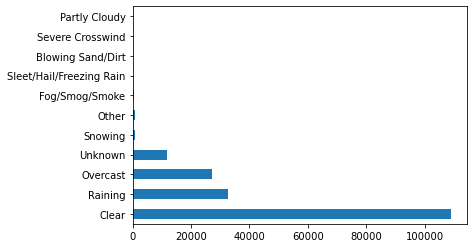

In [34]:
df_clean["weather"].value_counts().plot.barh()

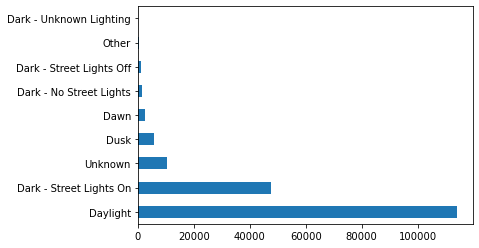

In [35]:
df_clean["lightcond"].value_counts().plot.barh()

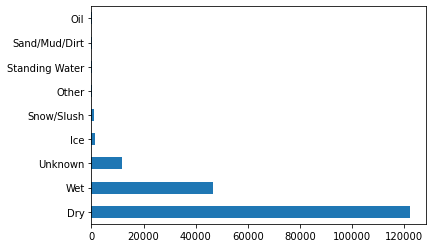

In [36]:
df_clean["roadcond"].value_counts().plot.barh()

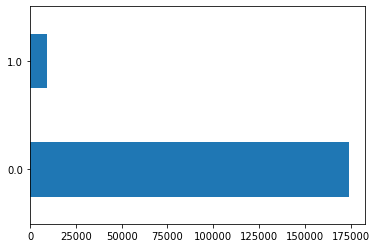

In [37]:
df_clean["underinfl"].value_counts().plot.barh()

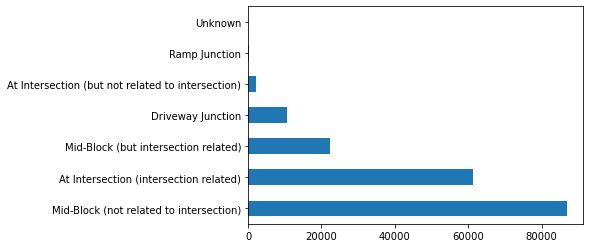

In [38]:
df_clean["junctiontype"].value_counts().plot.barh()

Numeric values summary

In [39]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
severitycode,183196.0,1.309335,0.462221,1.0,1.0,1.0,2.0,2.0
speeding,183196.0,0.050274,0.218510,0.0,0.0,0.0,0.0,1.0
underinfl,183196.0,0.049144,0.216169,0.0,0.0,0.0,0.0,1.0
personcount,183196.0,2.475660,1.370318,0.0,2.0,2.0,3.0,81.0
pedcylcount,183196.0,0.029886,0.171583,0.0,0.0,0.0,0.0,2.0
pedcount,183196.0,0.038942,0.202824,0.0,0.0,0.0,0.0,6.0
vehcount,183196.0,1.971828,0.563070,0.0,2.0,2.0,2.0,12.0
crosswalkkey,183196.0,10199.855701,73778.611075,0.0,0.0,0.0,0.0,5239700.0


In [40]:
df_clean["weather"] = df_clean["weather"].astype("category")
df_clean["weather"] = df_clean["weather"].cat.codes
df_clean["weather"].value_counts()

1     109163
6      32678
4      27208
10     11767
9        882
3        749
2        558
8        112
0         49
7         25
5          5
Name: weather, dtype: int64

In [41]:
df_clean["lightcond"] = df_clean["lightcond"].astype("category")
df_clean["lightcond"] = df_clean["lightcond"].cat.codes
df_clean["lightcond"].value_counts()

5    113972
2     47593
8     10553
6      5781
4      2454
0      1463
1      1158
7       211
3        11
Name: lightcond, dtype: int64

In [42]:
df_clean["roadcond"] = df_clean["roadcond"].astype("category")
df_clean["roadcond"] = df_clean["roadcond"].cat.codes
df_clean["roadcond"].value_counts()

0    122266
8     46758
7     11654
1      1179
5       980
3       123
6       109
4        67
2        60
Name: roadcond, dtype: int64

In [43]:
df_clean["junctiontype"] = df_clean["junctiontype"].astype("category")
df_clean["junctiontype"] = df_clean["junctiontype"].cat.codes
df_clean["junctiontype"].value_counts()

4    86856
1    61241
3    22353
2    10520
0     2057
5      162
6        7
Name: junctiontype, dtype: int64

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183196 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   severitycode  183196 non-null  int64  
 1   weather       183196 non-null  int8   
 2   lightcond     183196 non-null  int8   
 3   roadcond      183196 non-null  int8   
 4   speeding      183196 non-null  int64  
 5   underinfl     183196 non-null  float64
 6   personcount   183196 non-null  int64  
 7   pedcylcount   183196 non-null  int64  
 8   pedcount      183196 non-null  int64  
 9   vehcount      183196 non-null  int64  
 10  junctiontype  183196 non-null  int8   
 11  crosswalkkey  183196 non-null  int64  
dtypes: float64(1), int64(7), int8(4)
memory usage: 13.3 MB


# EDA

## Corr Matrix

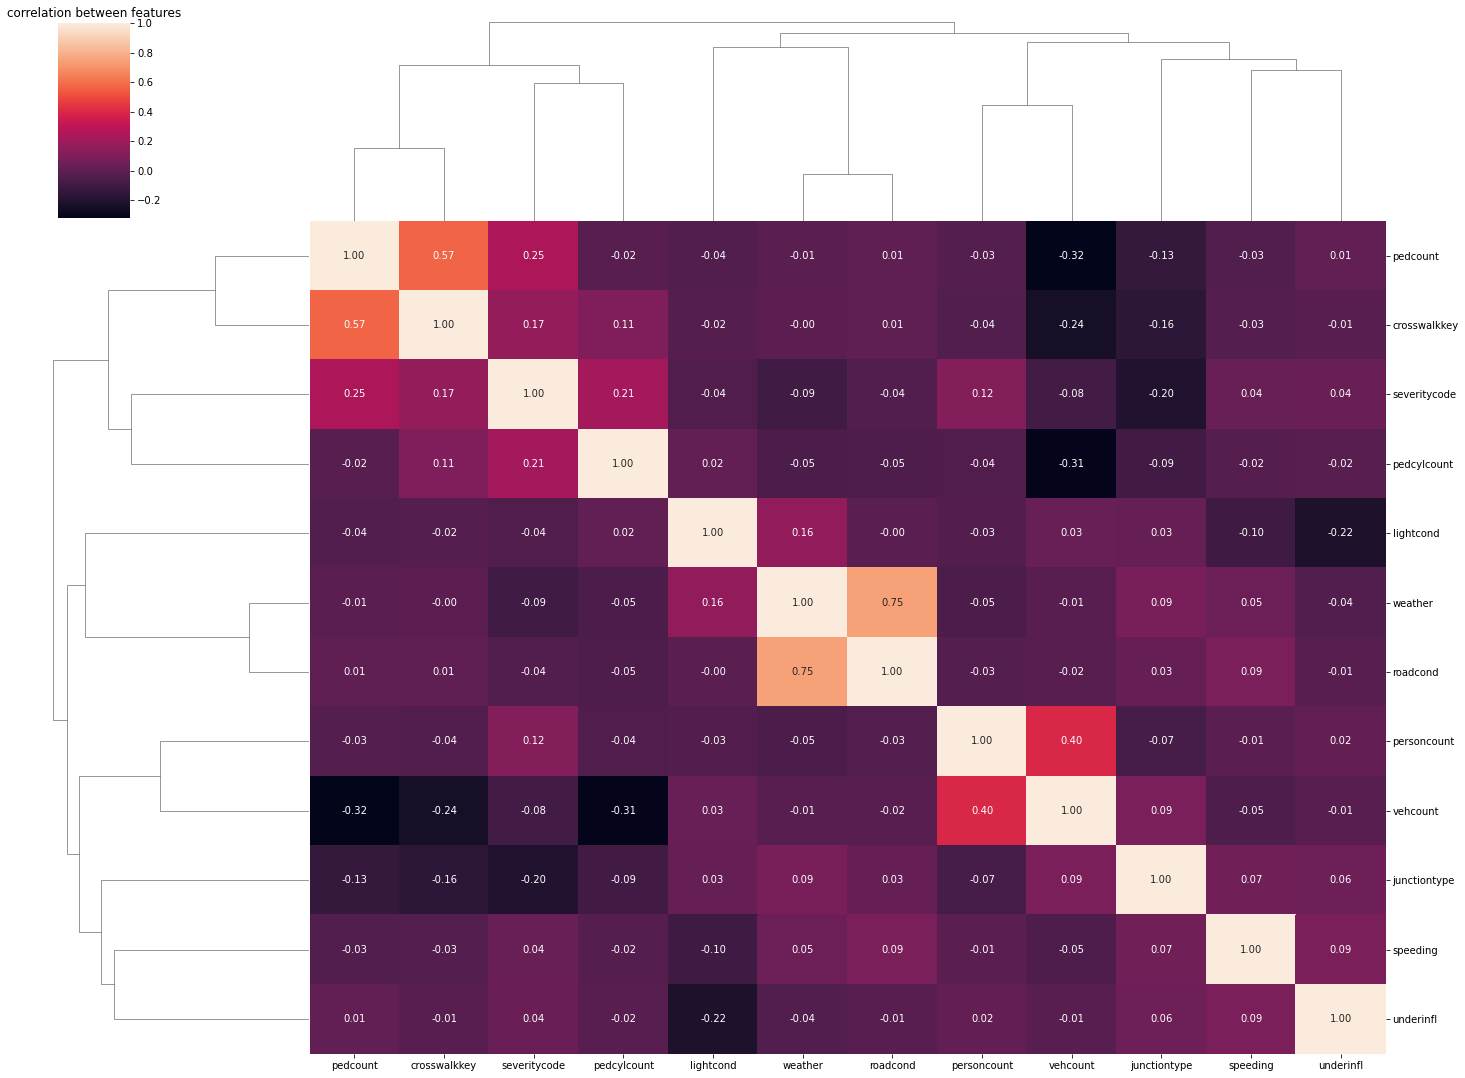

In [45]:
corr_matrix = df_clean.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize=(20, 15))
plt.title("correlation between features")
plt.show()

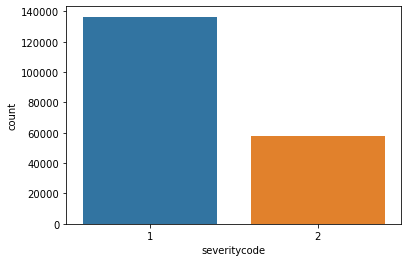

In [46]:
plt.figure()
sns.countplot(df["severitycode"])

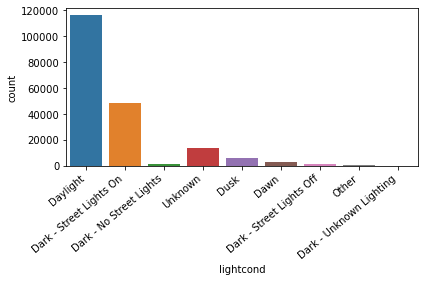

In [47]:
plt.figure()
ax = sns.countplot(df["lightcond"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

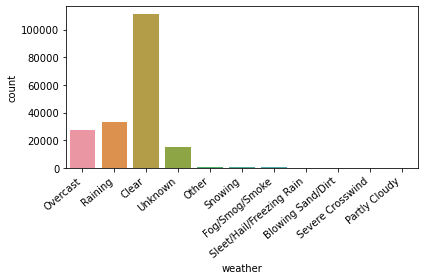

In [48]:
plt.figure()
ax = sns.countplot(df["weather"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

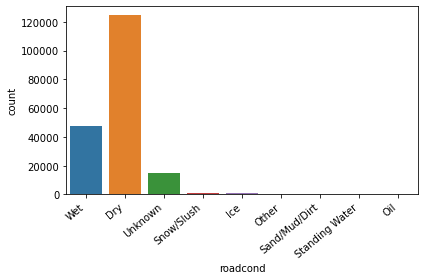

In [49]:
plt.figure()
ax = sns.countplot(df["roadcond"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

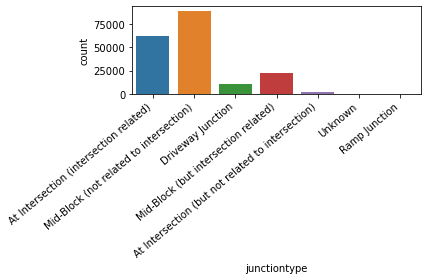

In [50]:
plt.figure()
ax = sns.countplot(df["junctiontype"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## Train Test Split

In [51]:
y = df_clean.severitycode
X = df_clean.drop(["severitycode"], axis = 1)
columns = X.columns.tolist()

In [52]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.3765232 ,  0.39050716,  1.50405985, -0.23007671, -0.22734127,
        -0.34711735, -0.17417903, -0.19199912,  0.050033  , -1.24738427,
        -0.13824987],
       [ 1.107783  , -1.40786766,  1.50405985, -0.23007671, -0.22734127,
        -0.34711735, -0.17417903, -0.19199912,  0.050033  ,  0.93297139,
        -0.13824987],
       [ 0.3765232 ,  0.39050716, -0.6948855 , -0.23007671, -0.22734127,
         1.11240159, -0.17417903, -0.19199912,  1.82601554,  0.93297139,
        -0.13824987],
       [-0.72036651,  0.39050716, -0.6948855 , -0.23007671, -0.22734127,
         0.38264212, -0.17417903, -0.19199912,  1.82601554,  0.93297139,
        -0.13824987],
       [ 1.107783  ,  0.39050716,  1.50405985, -0.23007671, -0.22734127,
        -0.34711735, -0.17417903, -0.19199912,  0.050033  , -1.24738427,
        -0.13824987]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146556, 11) (146556,)
Test set: (36640, 11) (36640,)


## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [55]:
y_pred = LR.predict(X_test)

In [56]:
y_pred_train = LR.predict(X_train)

In [57]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7437227074235808, train_score = 0.7444253391195175


In [58]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.61436116, 0.38563884],
       [0.54537733, 0.45462267],
       [0.78096829, 0.21903171],
       ...,
       [0.72229635, 0.27770365],
       [0.66395088, 0.33604912],
       [0.80824756, 0.19175244]])

In [59]:
jaccard_score(y_test, y_pred)

0.7232537577365163

In [60]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5387037404106739

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     25221
           2       0.80      0.24      0.37     11419

    accuracy                           0.74     36640
   macro avg       0.77      0.61      0.60     36640
weighted avg       0.76      0.74      0.69     36640



In [62]:
cm_log = confusion_matrix(y_test, y_pred)
cm_log

array([[24540,   681],
       [ 8709,  2710]], dtype=int64)

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [64]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [65]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
y_pred = drugTree.predict(X_test)

In [67]:
y_pred_train = drugTree.predict(X_train)

In [68]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7406386462882096, train_score = 0.7429105597860204


In [69]:
jaccard_score(y_test, y_pred)

0.7242149863602066

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.99      0.84     25221
           2       0.89      0.19      0.31     11419

    accuracy                           0.74     36640
   macro avg       0.81      0.59      0.58     36640
weighted avg       0.78      0.74      0.68     36640



In [71]:
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[24955,   266],
       [ 9237,  2182]], dtype=int64)

## XGBoost

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [74]:
y_pred = xgb_model.predict(X_test)

In [75]:
y_pred_train = xgb_model.predict(X_train)

In [76]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7462882096069869, train_score = 0.7515420726548213


In [77]:
jaccard_score(y_test, y_pred)

0.7243015599976274

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     25221
           2       0.79      0.26      0.39     11419

    accuracy                           0.75     36640
   macro avg       0.76      0.61      0.61     36640
weighted avg       0.76      0.75      0.70     36640



In [79]:
cm_xgb = confusion_matrix(y_test, y_pred)
cm_xgb

array([[24422,   799],
       [ 8497,  2922]], dtype=int64)

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [82]:
y_pred = knn_model.predict(X_test)

In [83]:
y_pred_train = knn_model.predict(X_train)

In [84]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7237718340611353, train_score = 0.7357597095990611


In [85]:
jaccard_knn = jaccard_score(y_test,y_pred)
jaccard_knn

0.6896826613521386

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.89      0.82     25221
           2       0.60      0.35      0.44     11419

    accuracy                           0.72     36640
   macro avg       0.67      0.62      0.63     36640
weighted avg       0.70      0.72      0.70     36640



In [87]:
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[22494,  2727],
       [ 7394,  4025]], dtype=int64)

## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [90]:
y_pred = rf_model.predict(X_test)

In [91]:
y_pred_train = rf_model.predict(X_train)

In [92]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.73992903930131, train_score = 0.764151587106635


In [93]:
jaccard_score(y_test,y_pred)

0.7156456089045388

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.95      0.83     25221
           2       0.72      0.27      0.40     11419

    accuracy                           0.74     36640
   macro avg       0.73      0.61      0.62     36640
weighted avg       0.73      0.74      0.70     36640



In [95]:
cm_rf = confusion_matrix(y_test, y_pred)
cm_rf

array([[23982,  1239],
       [ 8290,  3129]], dtype=int64)

## GBM

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [98]:
y_pred = gbm_model.predict(X_test)

In [99]:
y_pred_train = rf_model.predict(X_train)

In [100]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7456331877729258, train_score = 0.764151587106635


In [101]:
jaccard_score(y_test,y_pred)

0.7248302332447594

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     25221
           2       0.80      0.24      0.37     11419

    accuracy                           0.75     36640
   macro avg       0.77      0.61      0.61     36640
weighted avg       0.76      0.75      0.69     36640



In [103]:
cm_gbm = confusion_matrix(y_test, y_pred)
cm_gbm

array([[24550,   671],
       [ 8649,  2770]], dtype=int64)

## CatBoost

In [104]:
from catboost import CatBoostClassifier

In [105]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.08666
0:	learn: 0.6619043	total: 204ms	remaining: 3m 23s
1:	learn: 0.6369428	total: 234ms	remaining: 1m 56s
2:	learn: 0.6156330	total: 261ms	remaining: 1m 26s
3:	learn: 0.5996467	total: 291ms	remaining: 1m 12s
4:	learn: 0.5856715	total: 321ms	remaining: 1m 3s
5:	learn: 0.5747247	total: 357ms	remaining: 59.2s
6:	learn: 0.5662986	total: 389ms	remaining: 55.1s
7:	learn: 0.5597504	total: 421ms	remaining: 52.2s
8:	learn: 0.5535209	total: 449ms	remaining: 49.4s
9:	learn: 0.5487997	total: 473ms	remaining: 46.8s
10:	learn: 0.5447313	total: 500ms	remaining: 45s
11:	learn: 0.5410684	total: 530ms	remaining: 43.6s
12:	learn: 0.5380195	total: 573ms	remaining: 43.5s
13:	learn: 0.5352595	total: 605ms	remaining: 42.6s
14:	learn: 0.5331210	total: 634ms	remaining: 41.6s
15:	learn: 0.5313267	total: 659ms	remaining: 40.6s
16:	learn: 0.5298018	total: 694ms	remaining: 40.1s
17:	learn: 0.5284758	total: 726ms	remaining: 39.6s
18:	learn: 0.5273087	total: 757ms	remaining: 39.1s
19:	learn:

In [106]:
y_pred = cat_model.predict(X_test)

In [107]:
y_pred_train = rf_model.predict(X_train)

In [108]:
acc_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_train)
print('test_score = {}, train_score = {}'.format(acc_test, acc_train))

test_score = 0.7465065502183406, train_score = 0.764151587106635


In [109]:
jaccard_score(y_test, y_pred)

0.7241543167711086

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     25221
           2       0.78      0.26      0.39     11419

    accuracy                           0.75     36640
   macro avg       0.76      0.61      0.62     36640
weighted avg       0.75      0.75      0.70     36640



In [111]:
cm_cb = confusion_matrix(y_test, y_pred)
cm_cb

array([[24383,   838],
       [ 8450,  2969]], dtype=int64)

# Models

In [112]:
models = [knn_model,
         LR,
         drugTree,
         xgb_model,
         rf_model,
         gbm_model,
         cat_model
]

In [113]:
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*30)
    print(names + ":")
    print("Accuracy:  {:.4%}".format(accuracy))

------------------------------
KNeighborsClassifier:
Accuracy:  72.3772%
------------------------------
LogisticRegression:
Accuracy:  74.3723%
------------------------------
DecisionTreeClassifier:
Accuracy:  74.0639%
------------------------------
XGBClassifier:
Accuracy:  74.6288%
------------------------------
RandomForestClassifier:
Accuracy:  73.9929%
------------------------------
GradientBoostingClassifier:
Accuracy:  74.5633%
------------------------------
CatBoostClassifier:
Accuracy:  74.6507%


Text(0.5, 1.0, 'Models Accuracy Rate')

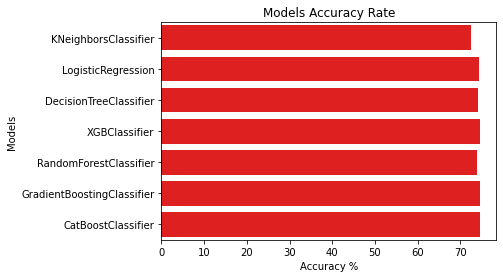

In [114]:
final = []

results = pd.DataFrame(columns = ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    final = pd.DataFrame([[names, accuracy*100]], columns = ["Models","Accuracy"])
    results = results.append(final)

sns.barplot(x = "Accuracy", y = "Models", data = results, color = "r")
plt.xlabel("Accuracy %")
plt.title("Models Accuracy Rate")

-----------------------------

| Algorithm          | Jaccard | F1-score | Train-Acc | Test-Acc |
|--------------------|---------|----------|-----------|----------|
| KNN                | 0.689   | 0.72     | 0.7357    | 0.7237   |
| LogisticRegression | 0.723   | 0.74     | 0.7444    | 0.7437   |
| Decision Tree      | 0.724   | 0.74     | 0.7429    | 0.7406   |
| XGBoost            | 0.724   | 0.75     | 0.7515    | 0.7462   |
| RandomForest       | 0.715   | 0.75     | 0.7641    | 0.7399   |
| GradientBoosting   | 0.724   | 0.75     | 0.7641    | 0.7456   |
| CatBoost           | 0.724   | 0.75     | 0.7641    | 0.7465   |